# 📐 Measuring discrimination with linear regression

❗❗❗ **Make sure to save a copy of this notebook to your Google Drive so your work isn't lost.**

## Introduction

In this tutorial, we'll use `R` to fit linear models that assess potentially discriminatory behavior in a hypothetical federal pretrial setting.

By the end of the tutorial, you'll have foundational understanding of the following:
1. 📏 How linear regression can be used to assess potential discrimination.
2. 📈 How to fit and interpret a linear model using `R`.

## ✅ Set up

Make sure to run the cell below. It imports additional useful functions, adjusts `R` settings, and loads in data. 

In [1]:
# Load in additional functions
library(tidyverse)

# Use three digits past the decimal point
options(digits = 3)

# This makes our plots look nice!
theme_set(theme_bw())

# This is where the data is stored.
DATA_PATH = "https://github.com/joshuagrossman/mse298-labs/raw/main/week3/data/lab-3-data.rds"

# Load in the data
data = read_rds(DATA_PATH)

── Attaching packages ────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.8     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.1
✔ readr   2.1.2     ✔ forcats 0.5.2
── Conflicts ───────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


## 🏛️ Primer on federal pretrial incarceration

⏮️ In the last lab, we covered the basics of the criminal pretrial process. 

⏭️ In this lab, we specifically consider federal pretrial detention.

⚖️ In several federal jurisdictions (though not all!), the pretrial process proceeds as follows:
1. First, there is an **initial hearing**.
2. During the initial hearing, the prosecutor may recommend that the defendant should be detained before their trial (i.e., the prosecutor **"moves to detain"**).
3. If the prosecutor does not move to detain, the defendant is typically released at the initial hearing.
4. If the prosecutor moves to detain, the defendant is temporarily detained. Officers of the court take several days to learn more about the defendant.
5. After this investigation, there is a **detention hearing**.
6. At the detention hearing, the judge decides whether the defendant should be detained or released before their trial. 

🎓 For more context on the federal pretrial process, see [Grossman, Nyarko, Goel (2023)](https://5harad.com/papers/multi-stage-bias.pdf).

This lab will analyze potential racial bias in **hypothetical motions for detention among federal prosecutors**.

## 🚀 Exercise: Understanding the data

The data in this lab is from a hypothetical pretrial setting. Each row represents a defendant.

1. Inspect the data. Which column indicates whether the prosecution moved to detain?

2. Using the data, calculate the proportion of defendants for whom the prosecution moves for detention. 

3. Then, calculate the same proportion for each race and ethnicity group. What do you find?

In [2]:
# Your code here!

# START ANSWER

head(data)

print('Prop. move to detain:')
mean(data$prosecution_detain)

data %>%
  group_by(race) %>%
  summarize(
    mean(prosecution_detain)
  )

# Overall, the prosecution moves to detain in about 2/3rds of cases.
# The prosecution moves to detain Black and Hispanic defendants at a rate more
# than 1.5 times the rate of white defendants. While this is prima facie 
# evidence of discriminatory behavior, this finding alone cannot determine
# whether the disparity can be traced to non-discriminatory factors

# END ANSWER

prosecution_detain,released,race,sex,age,risk,msd_convictions,fel_convictions,ftas_within_two_years,ftas_older_than_two_years,has_pending_charge,charge
<dbl>,<int>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<chr>
0,1,W,M,61,0,0,0,0,0,FALSE,FEL_INTX
0,1,W,M,26,1,1,0,0,0,FALSE,FEL_SEX
1,0,B,M,30,4,1,5,0,0,FALSE,FEL_METH
0,1,B,M,38,3,0,2,0,0,FALSE,FEL_FRAU
1,0,B,M,55,5,0,6,0,7,FALSE,FEL_ROBB
1,0,B,M,61,5,0,6,0,7,FALSE,FEL_ROBB


[1] "Prop. move to detain:"


[1] 0.625

race,mean(prosecution_detain)
<fct>,<dbl>
W,0.451
B,0.746
H,0.732


# 🗺️ The world's fastest primer on linear regression

**Linear regression estimates conditional means.** 

🤝 For example, I may be interested in estimating the hiring rate for different combinations of gender, race, and age.

Similar to the previous exercise, you could use a `group_by` and `summarize` statement to calculate the observed hiring rate for each combination.

👎 But, this approach has several downsides. For example:
- You need a table with $g*r*a$ cells to communicate the results, where $g$ is the number of genders, $r$ is the number of race groups, and $a$ is the number of age groups.
- How do I estimate hiring rates for cells with no data? For example, what if my sample has no 35 year-old Asian women?
- Can I trust estimated hiring rates in cells with only a few data points, or with big outliers?

〰️ Linear regression allows you to "smooth over" the observed combinations, and efficiently describe patterns in the data.

> That being said, in many scenarios, it can be informative to estimate and visualize conditional means directly (i.e., without using linear regression). We do this in the next exercise.

# 🚀 Exercise: Visualizing linear regression

1. For each value of the `risk` column, calculate the rate at which the prosecution moves for detention, and also the size of each group.

> `risk` is the defendant's statistically-estimated probability of violating if released. Later in the course, we'll discuss risk estimation.
> 
> The `n()` function may come in handy.

2. Using `ggplot()` to plot, for each value of `risk`, the rate at which the prosecution moves for detention. Map the size of the points to the size of each group, and connect the points with a line. 

3. Add a regression line to your plot with the following code:

> `+ geom_smooth(data=data, mapping=aes(x=risk, y=prosecution_detain), method='lm')`
>
> where `data` is the original data we loaded in above. `lm` stands for linear model.

Does the regression line appear to fit the data well? Explain.

`geom_smooth()` using formula 'y ~ x'



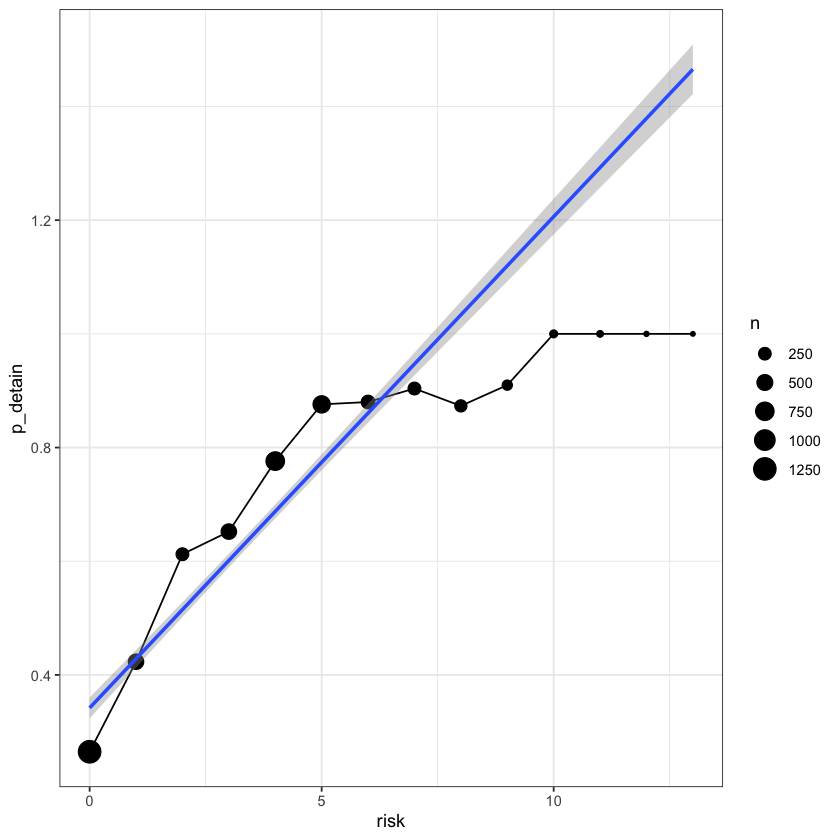

In [3]:
# Your code here!

# START ANSWER

plot_df = data %>%
  group_by(risk) %>%
  summarize(
    n = n(),
    p_detain = mean(prosecution_detain)
  )

plot_df %>%
  ggplot(aes(x=risk, y=p_detain)) +
  geom_point(aes(size=n)) +
  geom_line() +
  geom_smooth(data=data, mapping=aes(x=risk, y=prosecution_detain), method='lm')
  
# The regression line appear to fit the data well for values of risk below 7.
# The bulk of defendants have risk scores below 7.
# The probability of moving for detention increases as risk increases,
# which logically makes sense.
# For large risk values, the regression line estimates a probability of moving
# for detention that's greater than one. 
# While this practically does not make sense, mathematically the regression 
# algorithm does not know that the outcome is constrained between 0 and 1 
# in the real world. 
# All linear probability models (LPMs) have this issue, though they are still
# used often because they are easy to fit and interpret, and they tend to
# estimate binary outcomes pretty well in many cases.


# END ANSWER

## 🚀 Exercise: Connecting the output of `lm` to conditional means

Re-run your code above that calculates, by race, the proportion of defendants for whom the prosecution moves for detention. 

Then, run the following:

`lm(prosecution_detain ~ 1 + race, data=data)`

Are you able to connect the proportions you calculated to the output of this command? Explain.

In [4]:
# Your code here!

# START ANSWER

data %>%
  group_by(race) %>%
  summarize(
    mean(prosecution_detain)
  )

lm(prosecution_detain ~ 1 + race, data=data)

# It looks like the `(Intercept)` part of the output is the same as the
# proportion of white defendants for whom the prosecution moves for detention.
# If you add the values of `raceB` and `raceH` to the `(Intercept)` value,
# you get the corresponding proportions for Black and Hispanic defendants.

# END ANSWER

race,mean(prosecution_detain)
<fct>,<dbl>
W,0.451
B,0.746
H,0.732



Call:
lm(formula = prosecution_detain ~ 1 + race, data = data)

Coefficients:
(Intercept)        raceB        raceH  
      0.451        0.295        0.282  


## 🧮 Regression formulas

The linear regression algorithm fits a model to the data that estimates the **average value of the outcome conditional on the input variables**.

Using only the information in the `race` column, the algorithm made its best guess for the average value of `prosecution_detain` (i.e., the probability of moving for detention) for each possible value in the `race` column.

🔢 Here's the output as a formula:

$\widehat{\text{prosecution_detain}}_i = 0.451 + 0.295*\mathbb{I}_{\text{raceB}, i} + 0.282*\mathbb{I}_{\text{raceH}, i}$,

where $\widehat{\text{prosecution_detain}}_i$ is the estimated probability of $\text{prosecution_detain}$ for individual $i$, $\mathbb{I}_{\text{raceB}, i}$ is an indicator of whether individual $i$ is Black, and $\mathbb{I}_{\text{raceH}, i}$ is an indicator of whether individual $i$ is Hispanic.

> For reasons beyond the scope of this tutorial, the `lm` function automatically designates a **base level** of race/ethnicity, which in this case is `W` (i.e., white).
This base level is represented by $0.451$, or the **intercept term**.

## ➕ Including additional variables

Regression is not limited to one input. For example, we can include both the `race` and `risk` columns:

In [5]:
lm(prosecution_detain ~ 1 + race + risk, data=data)


Call:
lm(formula = prosecution_detain ~ 1 + race + risk, data = data)

Coefficients:
(Intercept)        raceB        raceH         risk  
     0.2803       0.1096       0.1803       0.0796  


🔎 Here's how to interpret these values:
1. `raceB` : **On average**, the prosecution is 11 percentage points more likely to move for detention of Black defendants than white defendants **with the same risk level**.
2. `raceH` : **On average**, the prosecution is 18 percentage points more likely to move for detention of Hispanic defendants than white defendants **with the same risk level**.
3. `risk` : A one point increase in risk leads to an 8 percentage point increase in the **estimated** probability of a motion for detention, **holding all other variables (i.e., race) constant**.
4. `(Intercept)` : For a white defendant with a risk level of 0, the prosecution moves for detention with an estimated probability of 0.28.

> ❗❗❗ Percentage points are different than percentages. For example, suppose my chance of winning a prize is 60%. If my chance of winning drops by 50%, my new probability of winning is **30%**. If my chance of winning drops by 50 percentage points, my new probability is **10%**.

👉 It looks like the racial disparities in the rate of moving for detention dropped substantially once we **adjusted** for estimated risk. 

> But, estimated risk isn't the only factor a prosecutor might account for in their decision to detain. For example, prosecuctors may be statutorily compelled to move for detention if the defendant is charged with certain crimes.

## 🚀 Exercise: Running a "kitchen-sink" regression

Fit a regression model that includes all columns in the data **except for `released`**, which indicates whether the defendant was **released at the initial hearing**.

Here's how to fit the model:

`lm(prosecution_detain ~ . - released, data=data)`

How do you interpret the `raceB` and `raceH` coefficients?

In [6]:
# Your code here!

# START ANSWER

lm(prosecution_detain ~ . - released, data=data)

# Prosecutors are, on average, 1.3 percentage points more likely to move for 
# detention of Black defendants, compared to white defendants with the same 
# values of all included variables.

# Same interpretation for Hispanic defendants, except the disparity is 
# 2.7 percentage points.

# Even though we've adjusted for many variables, the adjusted racial disparities
# may still suffer from omitted variable bias, in which case we cannot
# definitively say anything about disparate treatment. 

# Note that a "kitchen-sink" regression like this one is a very common approach 
# to assessing potential disparate treatment in both academic research and 
# court cases.

# END ANSWER


Call:
lm(formula = prosecution_detain ~ . - released, data = data)

Coefficients:
              (Intercept)                      raceB  
                 0.670298                   0.013327  
                    raceH                       sexF  
                 0.027654                  -0.084413  
                      age                       risk  
                -0.002366                   0.046870  
          msd_convictions            fel_convictions  
                 0.000127                   0.007977  
    ftas_within_two_years  ftas_older_than_two_years  
                -0.007146                   0.003554  
   has_pending_chargeTRUE             chargeFEL_COCA  
                -0.082473                   0.069457  
           chargeFEL_COUN             chargeFEL_EMBZ  
                -0.143456                  -0.413792  
           chargeFEL_ESCA             chargeFEL_FIRE  
                 0.175032                   0.038268  
           chargeFEL_FRAU            

## 🚀 Exercise: What about the `released` column?

Fit a regression model that includes **all** columns in the data, including `released`.

Why do you think the `raceH` coefficient changed so drastically?

> Hint: Create a confusion matrix for `prosecution_detain` and `released`. Remember that `released` indicates whether an individual was released at the initial hearing.

In [8]:
# Your code here!

# START ANSWER

count(data, prosecution_detain, released)

lm(prosecution_detain ~ ., data=data)

# The raceH coefficient is now 0, though raceB is about the same.
# The large change in the raceH coefficient is post-treatment bias in action.
# Motions for detentions are nearly perfectly predictive of whether a defendant
# is released at the initial hearing.
# The release decision comes after the prosecution moves for detention,
# so adjusting for the release decision attenuates the estimated disparities.
# See lecture slides for more details on post-treatment bias.

# Takeaway: don't adjust for post-treatment variables!

# END ANSWER

prosecution_detain,released,n
<dbl>,<int>,<int>
0,0,135
0,1,1666
1,0,2959
1,1,49



Call:
lm(formula = prosecution_detain ~ ., data = data)

Coefficients:
              (Intercept)                   released  
                 0.908847                  -0.877950  
                    raceB                      raceH  
                 0.012600                  -0.000952  
                     sexF                        age  
                -0.007782                  -0.000283  
                     risk            msd_convictions  
                 0.007051                  -0.001141  
          fel_convictions      ftas_within_two_years  
                 0.002305                  -0.000342  
ftas_older_than_two_years     has_pending_chargeTRUE  
                 0.001507                  -0.026658  
           chargeFEL_COCA             chargeFEL_COUN  
                 0.021531                   0.024860  
           chargeFEL_EMBZ             chargeFEL_ESCA  
                -0.002126                   0.061492  
           chargeFEL_FIRE             chargeFEL_